# **Prediction of Product Sales**

Kristina DiBella Silva

## Project Overview

## Data Dictionary

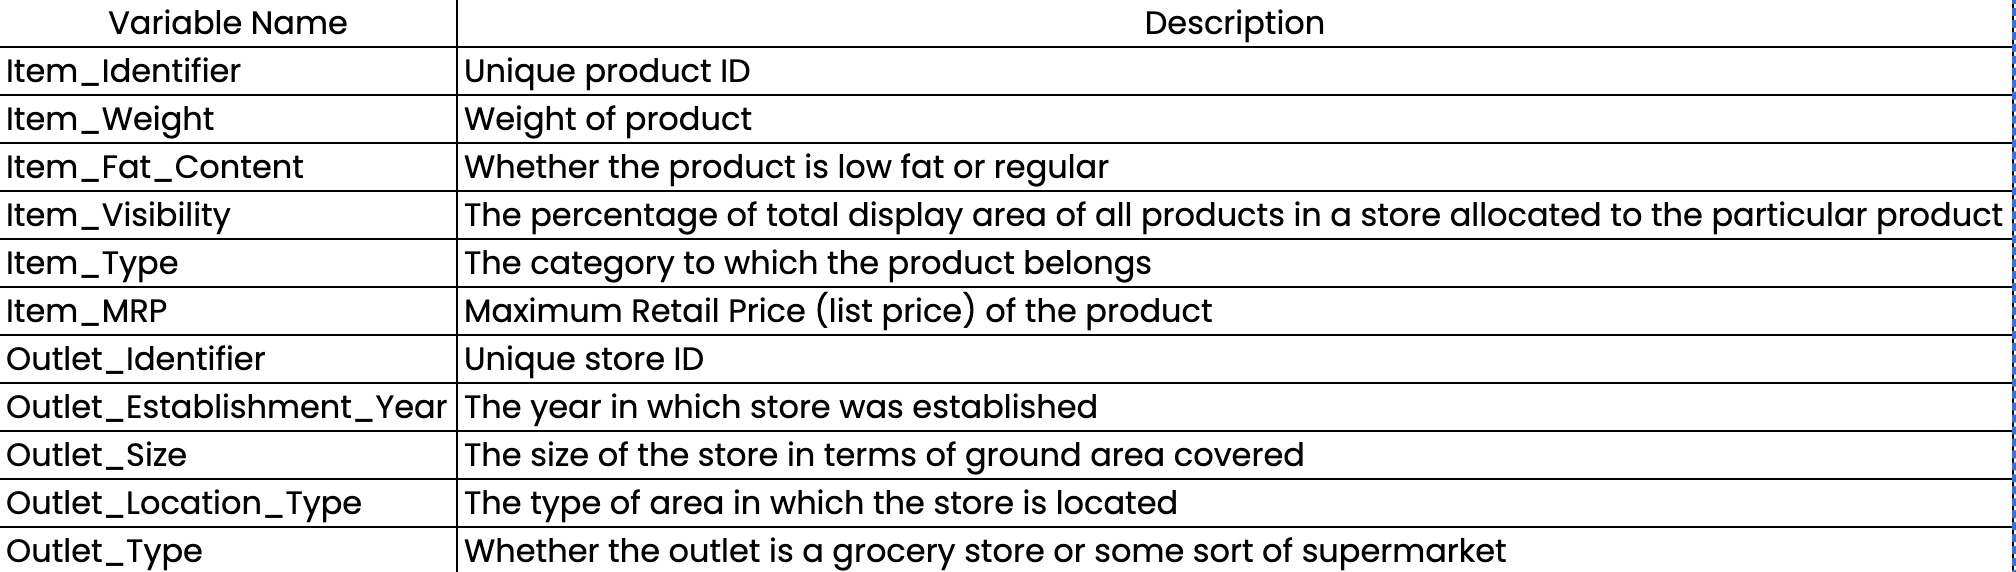

# Load and Inspect Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')


In [2]:
# CSV
filename = '../Data/sales_predictions.csv'
sp_df = pd.read_csv(filename)
sp_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
sp_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
sp_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

In [5]:
# How many rows and columns
sp_df.shape

(8523, 12)

- There are 8523 rows and 12 columns. 

In [6]:
# Data Types
sp_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
# Duplicates
sp_df.duplicated().sum()

0

- No duplicates found.

4) Identify missing values.

In [8]:
sp_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- There are 1463 missing values in the Item_Weight column. 

- There are 2410 missing values in the Outlet_Size column.

In [9]:
sp_df.isna().sum() / len(sp_df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

- Item_Weight is missing 17% of the values. 
- Outlet_Size is missing 28% of the values.

**Addressing the Outlet_Size missing values**
- 28% of the data for this column is missing, I  will be replacing the values with "Unknown".

In [10]:
sp_df['Outlet_Size'].fillna('Unknown', inplace= True)

**Addressing the missing Item_Weight values**
- I am going to check the mean of Item_Weight and compare it to the median. 

In [11]:
sp_df['Item_Weight'].mean()

12.857645184135976

- Mean is 9.300

In [12]:
sp_df['Item_Weight'].median()

12.6

- Median is 9.300

- There was no outlier as mean and median returned the same value 9.300.
- I will fill the missing values of Item_Weight with 9.300 using the average.

In [13]:
mean_iwght = sp_df['Item_Weight'].mean()
sp_df['Item_Weight'].fillna(mean_iwght, inplace=True)


In [14]:
sp_df['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [15]:
# confirm no more missing values
sp_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

- Item_Weight and Outlet_Size are no longer missing values.

In [16]:
# Find and fix any inconsistent categories of data
sp_df.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

- Item_Fat_Content has five different values, however looking at the data dictionary there should only be two, Low Fat or Regular. 
- I will need to check what the other values are in order to replace them with the correct value. 

In [17]:
sp_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

- I will replace "LF" and "low fat" with "Low Fat"
- I will replace "reg" with "Regular"

In [18]:
sp_df['Item_Fat_Content'] = sp_df['Item_Fat_Content'].replace('LF','Low Fat')
sp_df['Item_Fat_Content'] = sp_df['Item_Fat_Content'].replace('low fat','Low Fat')
sp_df['Item_Fat_Content'] = sp_df['Item_Fat_Content'].replace('reg','Regular')

sp_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [19]:
# numerical columns, obtain the summary statistics of each (min, max, mean)
sp_df.describe().round(2)numerical columns, obtain the summary statistics of each (min, max, mean)

SyntaxError: invalid syntax (1193831047.py, line 2)

## Exploratory Data Analysis

- Histogram to view the distributions of various features in your dataset.
- Boxplot to view statistical summaries of various features in your dataset.
- Heatmap of the correlation between features.

### Catagorical

Item Fat Content Count Plot

In [ ]:
ax = sns.countplot(data = sp_df, x= 'Item_Fat_Content')
ax.set_title('Fat Content');

- There are more Low Fat items than regular.

Item Type Count Plot

In [ ]:
ax = sns.countplot(data = sp_df, x= 'Item_Type')
ax.set_title('Item Type')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

- This bar chart shows that the highest amount of items are within the Fruits and Vegatables, secondly being Snack Food type and thirdly being Household items.

Outlet Identifier Count Plot

In [ ]:
ax = sns.countplot(data = sp_df, x= 'Outlet_Identifier')
ax.set_title('Outlet Identifier')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

- OUT010 and OUT019 have the least amount of enteries. 

Outlet Size Count Plot

In [ ]:
ax = sns.countplot(data = sp_df, x= 'Outlet_Size')
ax.set_title('Outlet Size');

- The High Outlet size has the least values and the Medium Outlet size has the highest. 

Outlet Location Count Plot

In [ ]:
ax = sns.countplot(data = sp_df, x= 'Outlet_Location_Type')
ax.set_title('Outlet Location Types');

- Tier 3 of location type has the highest count. 

Outlet Type Count Plot

In [ ]:
ax = sns.countplot(data = sp_df, x= 'Outlet_Type')
ax.set_title('Outlet Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

- Supermarket Type1 outstandingly carries the greater count of items. 

### Numerical

Item Weight Histogram and Box Plot.

In [ ]:
ax = sns.histplot(data= sp_df, x= 'Item_Weight')

ax.set_title('Item Weight');

In [ ]:
ax = sns.boxplot(x = 'Item_Weight', data = sp_df)
ax.set_title('Item Weight');

- There is a greater amount of items with the weight of 12.5.

Item Visibility Histogram and Box Plot.

In [ ]:
ax = sns.histplot(data= sp_df, x= 'Item_Visibility')

ax.set_title('Item Visibility');

In [ ]:
ax = sp_df['Item_Visibility'].plot(kind = 'box', vert= False)
ax.set_title('Item Visibility');

- The visibility of items are greatly skewed to the right. 

Item MRP Histogram and Box Plot.

In [ ]:
ax = sns.histplot(data= sp_df, x= 'Item_MRP')

ax.set_title('Item Maximum Retail Price');

In [ ]:
ax = sp_df['Item_MRP'].plot(kind = 'box', vert= False)
ax.set_title('Item Maximum Retail Price');

Outlet Establishment Year Histogram and Box Plot.

In [ ]:
ax = sns.histplot(data= sp_df, x= 'Outlet_Establishment_Year')

ax.set_title('Outlet Establishment Year');

In [ ]:
ax = sns.boxplot(x = 'Outlet_Establishment_Year', data = sp_df)
ax.set_title('Outlet Establishment Year');

- Most Outlets were established around 1986 and 1998.

Item Outlet Sales Histogram and Box Plot.

In [ ]:
price_fmt = StrMethodFormatter(" ₹ {x:,.0f}")
ax.xaxis.set_major_formatter(price_fmt)
ax = sns.histplot(data= sp_df, x= 'Item_Outlet_Sales')
ax.set_title('Item Outlet Sales')

price_fmt = StrMethodFormatter(" ₹ {x:,.0f}")
ax.xaxis.set_major_formatter(price_fmt);

In [ ]:
ax = sns.boxplot(x = 'Item_Outlet_Sales', data = sp_df)
ax.set_title('Item Outlet Sales');

- Item Outlet Sales is greatly skewed to the right. 

- Heatmap of the correlation between features.

In [ ]:
corr = sp_df.corr()
sns.heatmap(corr, cmap = 'Blues', annot= True);

This heat map shows us that the strongest correlation is with Item Outle Sales and Item MRP.

## Explanatory Data Analysis

In [ ]:
sp_df.head()

In [ ]:
ax = sns.scatterplot(data = sp_df, x = 'Item_MRP', y = 'Item_Outlet_Sales')
ax.set_title('Item Outlet Sales VS. Item MRP')

price_fmt = StrMethodFormatter(" ₹ {x:,.0f}")
ax.yaxis.set_major_formatter(price_fmt)

ax.xaxis.set_major_formatter(price_fmt)
ax.yaxis.set_major_formatter(price_fmt)

This scatter plot shows a moderate correlation between Item Outlet Sales and Item MRP.

In [ ]:
ax = sns.barplot(data = sp_df, x = 'Item_Outlet_Sales', y = 'Item_Type');
ax.set_title('Distribution of Item Outlet Sales by Item Type');

price_fmt = StrMethodFormatter(" ₹ {x:,.0f}")
ax.xaxis.set_major_formatter(price_fmt)

Which item type has the highest item outlet sales?

- This bar plot shows us that Seafood item's have the highest sales. Secondly, is going to be Starchy item's. We see this by the error bar show us the max item outlet sales.

In [ ]:
fig, axes = plt.subplots(ncols = 2, figsize = (9, 6))

price_fmt = StrMethodFormatter(" ₹ {x:,.0f}")
ax.yaxis.set_major_formatter(price_fmt)

sns.barplot(data = sp_df, x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales', ax = axes[0])
ax.yaxis.set_major_formatter(price_fmt)

axes[0].set_title('Outlet Location Type vs. Item Outlet Sales', fontsize = 12, fontweight = 'normal')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=75)


sns.barplot(data = sp_df, x = 'Outlet_Type', y = 'Item_Outlet_Sales', ax = axes[1])
ax.yaxis.set_major_formatter(price_fmt)

axes[1].set_title('Outlet Type vs. Item Outlet Sales', fontsize = 12, fontweight = 'normal')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=75)

fig.suptitle('Item Outlet Sales by Outlet Type & Location Type', fontsize = 14, fontweight = 'bold', y = .98)
fig.tight_layout();



Do Locations and Outlet types play a factor is producing high Item Outlet Sales?

- Tier 2 location type is highest is Item Outlet sales, but Tier 3 is a close second.
- As for Outlet Type, we see that the Supermarket Type 3 has the hightest in Item Outlet Sales when compared to the other Supermarket Types. The lowest being Grocery Store Outlet Type.

# Processing Data for Machine Learning

- You should load a fresh version of the original data set here using pd.read_csv() and start your cleaning process over to ensure there is no data leakage!

In [ ]:
# imports
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [ ]:
filename = '/content/drive/My Drive/Coding Dojo/Data/Fundamentals/sales_predictions.csv'
sp_df = pd.read_csv(filename)

In [ ]:
sp_df.head()

In [ ]:
sp_df.dtypes

- Drop duplicates and fix inconsistencies in categorical data.

In [ ]:
sp_df.nunique()

In [ ]:
#Duplicates
print(f'There are {sp_df.duplicated().sum()} duplicate values')

In [ ]:
#Correcting the inconsistant catagorical data

sp_df['Item_Fat_Content'] = sp_df['Item_Fat_Content'].replace('LF','Low Fat')
sp_df['Item_Fat_Content'] = sp_df['Item_Fat_Content'].replace('low fat','Low Fat')
sp_df['Item_Fat_Content'] = sp_df['Item_Fat_Content'].replace('reg','Regular')

sp_df['Item_Fat_Content'].value_counts()

- Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.

- Dropping 'Item_Identifier' as the amount of different values are not benefical for predictions and will not fit well for new data.

In [ ]:
X= sp_df.drop(columns= ['Item_Identifier','Item_Outlet_Sales'])
y= sp_df['Item_Outlet_Sales']


- Perform a train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state=42)

- Create a preprocessing object to prepare the dataset for Machine Learning

- Make sure your imputation of missing values occurs after the train test split using SimpleImputer.

In [ ]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [ ]:
cat_selector(X_train)

In [ ]:
num_selector(X_train)

In [ ]:
#imputer for numerical- median and catagorical- most freq
median_imputer = SimpleImputer(strategy='median')
freq_imputer = SimpleImputer(strategy='most_frequent')
#scaler
scaler = StandardScaler()
#One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
#Numeric pipeline
num_pipe = make_pipeline(median_imputer, scaler)
num_pipe

In [ ]:
#Categorical pipeline
cat_pipe = make_pipeline(freq_imputer, ohe)
cat_pipe

In [ ]:
#tuples for transformers
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

#column transformer
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder= 'passthrough',verbose_feature_names_out=False)

preprocessor

In [ ]:
# fit preprocessor to X train only
preprocessor.fit(X_train)

In [ ]:
#transform for both
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# First get column names
cols = preprocessor.get_feature_names_out()

# Transform to dataframes
X_train_processed_df = pd.DataFrame(X_train_processed, 
                          columns = cols,
                          index = X_train.index)

X_test_processed_df = pd.DataFrame(X_test_processed, 
                         columns = cols,
                         index = X_test.index)

In [ ]:
X_train_processed_df.describe().round(2)

In [ ]:
X_test_processed_df.describe().round(2)

# Modeling

In [ ]:
# Function for evaluating metrics

def eval_regression(y_true, y_pred, name='model'):
  """Takes true targets and predictions from a regression model and prints
  MAE, MSE, RMSE, AND R2 scores
  Set 'name' to name of model and 'train' or 'test' as appropriate"""
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'{name} Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

## Linear Regression

In [ ]:
# Instantiate model
lin = LinearRegression()

In [ ]:
# Model pipeline
lin_pipe = make_pipeline(preprocessor, lin)

In [ ]:
lin_pipe.fit(X_train,y_train)

In [ ]:
lin_train_pred = lin_pipe.predict(X_train)
lin_test_pred = lin_pipe.predict(X_test)

eval_regression(y_train, lin_train_pred, name='Linear Regression Train')
eval_regression(y_test, lin_test_pred, name='Linear Regression Test ')

Linear Regression Test  Scores

MAE: 792.0266 

MSE: 1,143,555.2488 

RMSE: 1,069.3714 

R2: 0.5793

###Lasso


In [ ]:
# Function to take the true and predicted values and print regression metrics
def model_metrics(pipe, X_train, y_train, X_test, y_test, 
                       model_name='Regression Model'):
  
  """Takes a regression model, training features and target and testing features and target.
  Returns a dataframe of regression metrics"""

  ## Predictions
  train_pred = pipe.predict(X_train)
  test_preds = pipe.predict(X_test)
  
  metrics = ['train_MAE','test_MAE', 
             'train_RMSE', 'test_RMSE', 
             'train_R2', 'test_R2']
  
  ## Train
  train_mae = round(mean_absolute_error(y_train, train_pred),4)
  train_rmse = round(np.sqrt(mean_squared_error(y_train, train_pred)),4)
  train_r2 = round(r2_score(y_train, train_pred),4)

  ## Test
  test_mae = round(mean_absolute_error(y_test, test_preds),4)
  test_rmse = round(np.sqrt(mean_squared_error(y_test, test_preds)),4)
  test_r2 = round(r2_score(y_test, test_preds),4)

  ## Output Dataframe
  scores = pd.DataFrame(columns=metrics, index=[f'{model_name}'])
  scores.loc[f'{model_name}', :] = [train_mae, test_mae,
                                          train_rmse, test_rmse,
                                          train_r2, test_r2]

  return scores

In [ ]:
from sklearn.linear_model import Lasso

# Model
lasso = Lasso()
# Model pipeline
lasso_pipe = make_pipeline(preprocessor, lasso)
# Fit the model
lasso_pipe.fit(X_train, y_train)

In [ ]:
lasso_scores = model_metrics(lasso_pipe, X_train=X_train, y_train=y_train, 
                          X_test=X_test, y_test=y_test, 
                           model_name='Lasso Model')

display(lasso_scores)

In [ ]:
## Hyperparameters for tuning
lasso.get_params()

In [ ]:
from IPython.core.display import clear_output


## Range of alpha values
alphas = [.0001, .001, .01, .1, 1, 10, 100, 1000]

## Dataframe to store Train and Test R2 scores
scores = pd.DataFrame(index=alphas, columns=['Train R2', 'Test R2'])
## Loop through the alpha values

for alpha in alphas:
   clear_output(wait=True)
   print(f'testing alpha of {alpha} of {alphas}')
   ## Create an instance of the model
   lasso = Lasso(alpha=alpha)
   ## Create a model pipeline
   lasso_pipe = make_pipeline(preprocessor, lasso)
   ## Fit the model
   lasso_pipe.fit(X_train, y_train)

   ## Obtain the predictions from the model
   train_pred = lasso_pipe.predict(X_train)
   test_pred = lasso_pipe.predict(X_test)

   ## Obtain the R2 scores for Train and Test
   train_r2score = r2_score(y_train, train_pred)
   test_r2score = r2_score(y_test, test_pred)

   ## Save the Train and Test R2 Score for this depth in the scores dataframe
   scores.loc[alpha, 'Train R2'] = train_r2score
   scores.loc[alpha, 'Test R2'] = test_r2score

In [ ]:
scores

In [ ]:
## Plot the scores
plt.plot(alphas, scores['Test R2'])
plt.plot(alphas, scores['Train R2'])
plt.xscale('log')
plt.suptitle('R2 Scores by Alpha Values')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.show()

In [ ]:
## Create a version on the scores dataframe
sorted_scores = scores.sort_values(by='Test R2', ascending=False)
## Display the first (5) rows of the dataframe
sorted_scores.head()

In [ ]:
## sort the dataframe by test scores and save the index of the best score
best_alpha = sorted_scores.index[0]
## Display best_alpha
best_alpha

In [ ]:
## Create an instance of the model
best_lasso = Lasso(alpha=best_alpha)
## Create a model pipeline
best_lasso_pipe = make_pipeline(preprocessor, best_lasso)
## Fit the model
best_lasso_pipe.fit(X_train, y_train)

In [ ]:
## Display model performance metrics using a function
lasso_tuned_scores = model_metrics(best_lasso_pipe, X_train=X_train, y_train=y_train, 
                          X_test=X_test, y_test=y_test, 
                           model_name='Tuned Lasso Model')


display(lasso_tuned_scores)

## Regression Decision Tree

In [ ]:
dec_tree = DecisionTreeRegressor(random_state = 42)

In [ ]:
dec_tree.fit(X_train_processed, y_train)


In [ ]:
train_pred = dec_tree.predict(X_train_processed)
test_pred = dec_tree.predict(X_test_processed)


In [ ]:
# evaluate the model
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)

print(f'Training Score: {train_score}')
print(f'Test Score: {test_score}')


In [ ]:
# Options for tuning this model
dec_tree.get_params()


In [ ]:
# What was the depth of our default tree
dec_tree.get_depth()


In [ ]:
# How many leaf nodes
dec_tree.get_n_leaves()


In [ ]:
# Tune depth

# List of values to try for max_depth:
depths = list(range(2, 38)) 

# Data frame to store the score for each value of max_depth:
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth = depth, random_state = 42)
    dec_tree.fit(X_train_processed, y_train)
    train_score = dec_tree.score(X_train_processed, y_train)
    test_score = dec_tree.score(X_test_processed, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score


In [ ]:
# Visualize which max_depth leads to the highest r2

plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');


In [ ]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()


In [ ]:
# Run the model with our optimized value for max_depth, 5

dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_5.fit(X_train_processed, y_train)
train_5_score = dec_tree_5.score(X_train_processed, y_train)
test_5_score = dec_tree_5.score(X_test_processed, y_test)

print(f'Training Score: {train_5_score}')
print(f'Test Score: {test_5_score}')


In [ ]:
reg_train_pred = dec_tree_5.predict(X_train_processed)
reg_test_pred = dec_tree_5.predict(X_test_processed)

eval_regression(y_train, reg_train_pred, name='Regression Tree Train')
eval_regression(y_test, reg_test_pred, name='Regression Tree Test ')

## Recommended Model

The Regression Tree model performed slightly better than the Linear Regression model. Regression model has an R2 score of 61% with a mean absolute error 763.06 , where as the Linear model is at 57% with a mean absolute error 792.02, which is a averager margin of error.

# Project 1: Revisited 

## LinearRegression

## Decision Tree

## Save Best Models with Joblib